# Task 5 Transformation (II)

## Import and Initializing

In [1]:
import itertools

import numpy as np  # pip install numpy
import scipy.stats  # pip install scipy

import pandas as pd  # pip install pandas
import matplotlib.pyplot as plt  # pip install matplotlib
import seaborn as sns  # pip install seaborn

sns.set_context("notebook")
sns.set_style("whitegrid")

np.seterr("raise")

FIG_SIZE = (14, 4)

## Loading the data

In [2]:
sheet = pd.read_excel(
    "../datasets/DB01_gaming_video_quality_dataset.xlsx",
    usecols=["VQ"]
)

## Preparing the scales

In [3]:
scales = pd.DataFrame(
    [[1, 7], [1, 5], [1, 4.5]],
    index=["7-point scale", "5-point scale", "norm scaled"],
    columns=["min", "max"]
)

scales

,min,max
7-point scale,1,7.0
5-point scale,1,5.0
norm scaled,1,4.5


## Scaling

In [4]:
def perform_scale(data, input_scale, output_scale):
    input_scale_width = input_scale["max"] - input_scale["min"]
    output_scale_width = output_scale["max"] - output_scale["min"]
    
    zero_align = (data - input_scale["min"])
    normalised = zero_align / input_scale_width
    
    rescaled = normalised * output_scale_width + output_scale["min"]
    return rescaled

In [5]:
original = sheet.VQ

scaled_5 = perform_scale(original, scales.loc["7-point scale"], scales.loc["5-point scale"])
scaled_norm = perform_scale(scaled_5, scales.loc["5-point scale"], scales.loc["norm scaled"])

## Plotting data in all scales

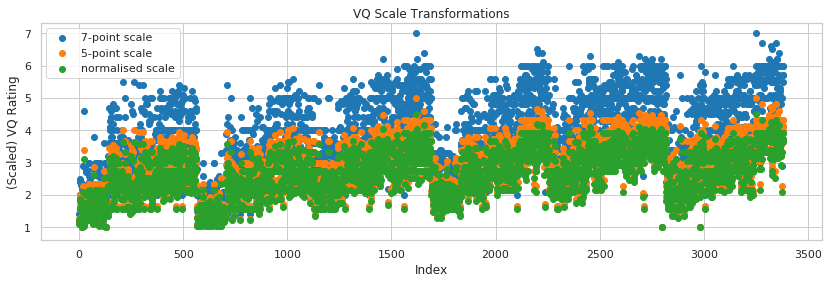

In [6]:
x = original.index

fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.scatter(x, original, label="7-point scale")
ax.scatter(x, scaled_5, label="5-point scale")
ax.scatter(x, scaled_norm, label="normalised scale")
ax.set_xlabel("Index")
ax.set_ylabel("(Scaled) VQ Rating")
ax.set_title("VQ Scale Transformations")
ax.legend()

None